In [165]:
import cv2 as cv 
import glob
import os
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [166]:
class animals:
    def __init__(self, loc, type):
        self.animalImage = None
        self.vectored = None
        self.loc = loc
        self.type = type
        self.clusterAssign = None
        self.centroidVal = None
        
    def readImages(self):
        self.animalImage = cv.imread(self.loc)
        if self.animalImage is None:
            raise ValueError(f"Image at {self.loc} could not be read.")
    
    def display(self):
        if self.animalImage is not None:
            cv.imshow(self.type, self.animalImage)
            cv.waitKey(0)
            cv.destroyAllWindows()
        else:
            raise ValueError("No image to display.")
    
    def resizeImages(self):
        resize = cv.resize(self.animalImage, (128, 128), interpolation=cv.INTER_AREA)
        return resize
    
    def flattenImages(self):
        self.animalImage = self.resizeImages()
        array = np.array(self.animalImage)
        self.vectored = array.flatten()
    
    def normalizePixels(self):
        norm = self.vectored / 255.0
        self.vectored = norm
        
    def getType(self):
        return self.type
    
    def setCluster(self, cluster):
        self.clusterAssign = cluster
        
    def getCluster(self):
        return self.clusterAssign
    
    def setCentroid(self, center):
        self.centroidVal = center
    
    def getCentroid(self):
        return self.centroidVal
    
    def getVectored(self):
        return self.vectored

In [167]:
class K_MEANS:
    def __init__(self):
        self.animalList = []
        self.path = 'E:\\progamming\\Machine learning\\internship\\Clustering\\animals\\*.jpg'
        self.train = []
        self.test= []
        self.costofClusters = []
    
    def storeImages(self):
        temp = glob.glob(self.path)
        for paths in temp:
            type = os.path.basename(paths)
            ani = animals(paths, type)
            ani.readImages()
            ani.flattenImages()
            ani.normalizePixels()
            #print(f"name: {type}, loc: {paths}")
            self.animalList.append(ani)
            
        for image in self.animalList:
            #image.display() 
            pass
    
    def splitData(self):
        self.train = np.concatenate((self.animalList[0:10], self.animalList[15:25]), axis=0)
        self.test = np.concatenate((self.animalList[10:15], self.animalList[25:30]), axis=0)
        
        self.train = np.array(self.train)
        self.test = np.array(self.test)
        
        np.random.seed(42)
        np.random.shuffle(self.train)
        np.random.shuffle(self.test)
        
        print(f"Length: {len(self.train)} \nType: [{[ani.getType() for ani in self.train]}]\n")
        print(f"Length: {len(self.test)} \nType: [{[ani.getType() for ani in self.test]}]\n")
    
    def distance(self, cent, ex):
        # dist = ex - cent
        # return dist ** 2
        return np.linalg.norm(ex - cent) ** 2
    
    def cost(self, lists):
        temp = 0
        for ani in lists:
            temp = temp + self.distance(ani.getCentroid(), ani.getVectored())
            
        return temp / len(lists)
        
    def training(self):
        costList = []
        np.random.seed(42)
        ind = np.random.choice(len(self.train), size=2, replace=False)
        centeroid1 = self.train[ind[0]].getVectored()
        centeroid2 = self.train[ind[1]].getVectored()
        for _ in range(10):
            for ani in self.train:
                dist1 = self.distance(centeroid1, ani.getVectored())
                dist2 = self.distance(centeroid2, ani.getVectored())
                if dist1 < dist2:
                    ani.setCluster(1)
                    ani.setCentroid(centeroid1)
                else:
                    ani.setCluster(2)
                    ani.setCentroid(centeroid2)
            
            temp1 = temp2 = 0  
            num1 = num2 = 0      
            for ani in self.train:
                if ani.getCluster() == 1:
                    temp1 += ani.getVectored()
                    num1 += 1
                elif ani.getCluster() == 2:
                    temp2 += ani.getVectored()
                    num2 += 1
            if num1 > 0:
                temp1 = temp1/num1
            if num2 > 0:
                temp2 = temp2/num2
            
            centeroid1 = temp1
            centeroid2 = temp2
            
            costList.append(self.cost(self.train))
        
        plt.figure(figsize=(10, 5))
        plt.plot(costList, label='cost')
        plt.xlabel('number')
        plt.ylabel('cost')
        plt.legend()
        plt.show()
        print("Cost of training set: ", self.cost(self.train))  
        
        cluster1 = []
        cluster2 = []
        for ani in self.train:
                if ani.getCluster() == 1:
                    cluster1.append(ani.getType())
                    #print(f"Cluster 1: {ani.getType()}")
                elif ani.getCluster() == 2:
                    cluster2.append(ani.getType())
                    #print(f"Cluster 2: {ani.getType()}")
        
        print(f"Cluster 1: {cluster1}")
        print(f"Cluster 2: {cluster2}")
        #self.costofClusters.append(self.cost(self.train))
    
    def testing(self):
        centeroid1 = self.train[0].getCentroid()
        centeroid2 = self.train[1].getCentroid()
        print(f"Centroid 1: {centeroid1}, Centroid 2: {centeroid2}")
        # Assign clusters to test data
        cluster_assignments = []
        for ani in self.test:
            dist1 = self.distance(centeroid1, ani.getVectored())
            dist2 = self.distance(centeroid2, ani.getVectored())
            if dist1 < dist2:
                ani.setCluster(1)
                ani.setCentroid(centeroid1)
            else:
                ani.setCluster(2)
                ani.setCentroid(centeroid2)
            cluster_assignments.append(ani.getCluster())
        
        # Compute cost for test data
        test_cost = self.cost(self.test)
        print(f"Cost of test set: {test_cost}")
        
        # Optional: Print cluster assignments for test data
        cluster1 = [ani.getType() for ani in self.test if ani.getCluster() == 1]
        cluster2 = [ani.getType() for ani in self.test if ani.getCluster() == 2]
        
        print(f"Cluster 1: {cluster1}")
        print(f"Cluster 2: {cluster2}")

In [168]:
model = K_MEANS()

In [169]:
model.storeImages()

In [170]:
model.splitData()

Length: 20 
Type: [['cat1.jpg', 'dog2.jpg', 'dog14.jpg', 'cat10.jpg', 'cat3.jpg', 'cat14.jpg', 'dog10.jpg', 'cat12.jpg', 'dog3.jpg', 'dog15.jpg', 'dog12.jpg', 'cat11.jpg', 'cat4.jpg', 'dog4.jpg', 'cat13.jpg', 'dog11.jpg', 'cat2.jpg', 'dog1.jpg', 'dog13.jpg', 'cat15.jpg']]

Length: 10 
Type: [['dog5.jpg', 'cat7.jpg', 'dog7.jpg', 'dog6.jpg', 'dog8.jpg', 'dog9.jpg', 'cat8.jpg', 'cat5.jpg', 'cat9.jpg', 'cat6.jpg']]



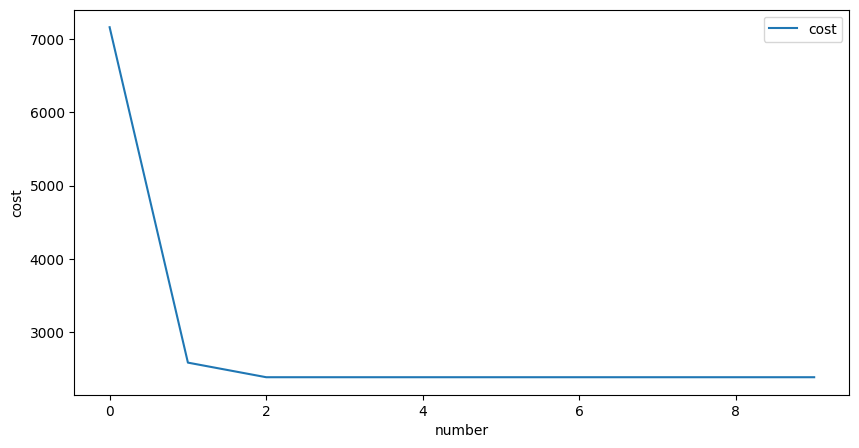

Cost of training set:  2388.9011164616168
Cluster 1: ['dog2.jpg', 'dog14.jpg', 'cat14.jpg', 'dog10.jpg', 'dog3.jpg', 'dog15.jpg', 'dog12.jpg', 'cat11.jpg', 'cat4.jpg', 'dog11.jpg', 'cat2.jpg', 'cat15.jpg']
Cluster 2: ['cat1.jpg', 'cat10.jpg', 'cat3.jpg', 'cat12.jpg', 'dog4.jpg', 'cat13.jpg', 'dog1.jpg', 'dog13.jpg']


In [171]:
model.training()

In [172]:
model.testing()

Centroid 1: [0.72058824 0.70931373 0.67745098 ... 0.62156863 0.65735294 0.6754902 ], Centroid 2: [0.42745098 0.44836601 0.44019608 ... 0.19379085 0.26045752 0.30424837]
Cost of test set: 2929.182644266094
Cluster 1: ['cat7.jpg', 'dog7.jpg']
Cluster 2: ['dog5.jpg', 'dog6.jpg', 'dog8.jpg', 'dog9.jpg', 'cat8.jpg', 'cat5.jpg', 'cat9.jpg', 'cat6.jpg']
